In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.signal as sig


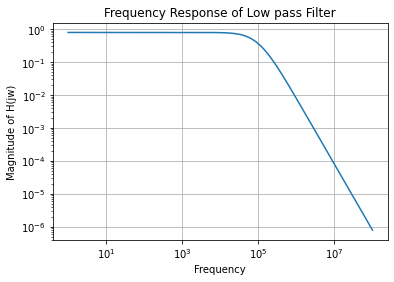

In [12]:
def lowpass(R1,R2,C1,C2,G,Vi):
    s=sp.symbols('s')
    #creating A and b matrices
    A = sp.Matrix([[0,0,1,-1/G],[-1/(1+s*R2*C2),1,0,0], [0,-G,G,1],[-1/R1-1/R2-s*C1,1/R2,0,s*C1]])
    b = sp.Matrix([0,0,0,-Vi/R1])
    #solving the system of equations using inverse
    V = A.inv() * b
    return (A, b, V)

A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1) 
Vo=V[3] 
ww=np.logspace(0,8,801)
ss=1j*ww
s = sp.symbols('s')
hf=sp.lambdify(s,Vo,'numpy')
v=hf(ss)


plt.loglog(ww,abs(v))
plt.xlabel('Frequency')
plt.ylabel('Magnitude of H(jw)')
plt.title('Frequency Response of Low pass Filter')
plt.grid(True)
plt.show()

In [13]:
#defining a function to convert sympy transfer function polynomial to scipy lti system
def sympy_to_lti(xpr, s=sp.Symbol('s')):
    num, den = sp.simplify(xpr).as_numer_denom()  # expressions
    p_num_den = sp.poly(num, s), sp.poly(den, s)  # polynomials
    c_num_den = [sp.poly(p).all_coeffs() for p in p_num_den]  # coefficients
    l_num, l_den = [sp.lambdify((), c)() for c in c_num_den]  # convert to floats
    return sig.lti(l_num, l_den)

In [14]:
#The Assignment

/Users/ishaan/Desktop/EE2703 - Applied Programming Lab/Assignment_7/venv/lib/python3.8/site-packages/scipy/sparse/linalg/_matfuncs.py:708: LinAlgWarning: Ill-conditioned matrix (rcond=1.60065e-35): result may not be accurate.
  return solve(Q, P)


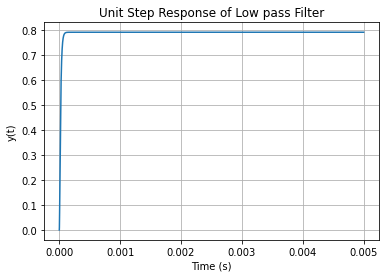

In [15]:
#Question 1

#defining the lowpass filter 
A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1/s) 
Vo=V[3]

Vo_s = sympy_to_lti(Vo)
t = np.linspace(0, 0.005, 100000)
t, y = sig.impulse(Vo_s, None, t)

#plot the unit step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.title('Unit Step Response of Low pass Filter')
plt.grid(True)
plt.show()


/Users/ishaan/Desktop/EE2703 - Applied Programming Lab/Assignment_7/venv/lib/python3.8/site-packages/scipy/sparse/linalg/_matfuncs.py:708: LinAlgWarning: Ill-conditioned matrix (rcond=1.60065e-35): result may not be accurate.
  return solve(Q, P)


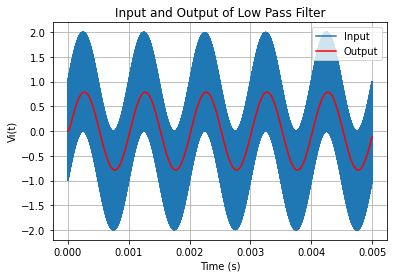

In [16]:
#Question 2
#Obtaining the response for a mixed frequency input 

'''
Vi(t) = [sin(2000πt)+cos(2x10^6πt)]u0(t) Volts
'''

#low pass filter
a, b, V = lowpass(10000,10000,1e-9,1e-9,1.586,1)
Vo=V[3]
H = sympy_to_lti(Vo)
t = np.linspace(0, 0.005, 100000)
Vi = np.sin(2000*np.pi*t)+np.cos(2e6*np.pi*t)
t, y, svec = sig.lsim(H, Vi, t)

#plotting the input
plt.plot(t, Vi)
plt.plot(t, y, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Vi(t)')
plt.title('Input and Output of Low Pass Filter')
plt.grid(True)
plt.legend(['Input','Output'])
plt.show()




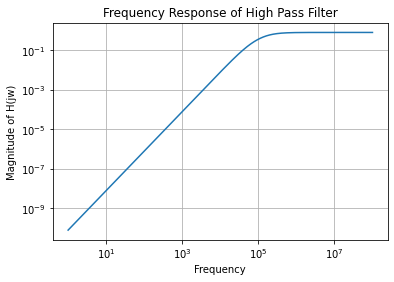

In [17]:
#Question 3

def highpass(R1,R3,C1,C2,G,Vi):
    ''' High pass filter '''
    s=sp.symbols('s')
    A=sp.Matrix([[0,0,1,-1/G],[-1/(1+1/(s*R3*C2)),1,0,0],[0,-G,G,1],[-s*C1-s*C2-1/R1,s*C2,0,1/R1]])
    b=sp.Matrix([0,0,0,-Vi*s*C1])
    V = A.inv()*b
    return (A,b,V)

A,b,V=highpass(10000,10000,1e-9,1e-9,1.586,1) 
Vo=V[3] 
ww=np.logspace(0,8,801)
ss=1j*ww
s = sp.symbols('s')
hf=sp.lambdify(s,Vo,'numpy')
v=hf(ss)
plt.loglog(ww,abs(v))
plt.xlabel('Frequency')
plt.ylabel('Magnitude of H(jw)')
plt.title('Frequency Response of High Pass Filter')
plt.grid(True)
plt.show()



/Users/ishaan/Desktop/EE2703 - Applied Programming Lab/Assignment_7/venv/lib/python3.8/site-packages/scipy/sparse/linalg/_matfuncs.py:708: LinAlgWarning: Ill-conditioned matrix (rcond=4.28731e-35): result may not be accurate.
  return solve(Q, P)
/Users/ishaan/Desktop/EE2703 - Applied Programming Lab/Assignment_7/venv/lib/python3.8/site-packages/scipy/sparse/linalg/_matfuncs.py:708: LinAlgWarning: Ill-conditioned matrix (rcond=1.59748e-35): result may not be accurate.
  return solve(Q, P)


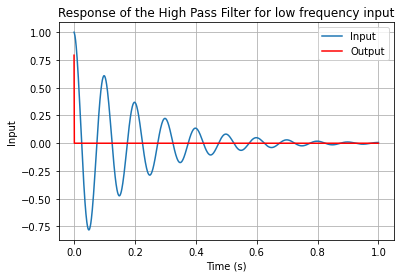

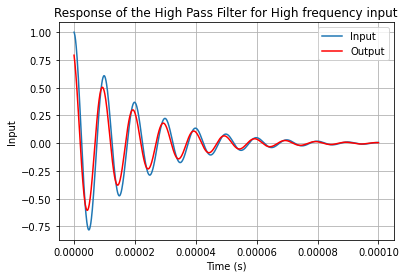

In [18]:
#Question 4
#To obtain the response of the system for a damped sinusoid
'''
Vi1(t) = e^(-5t) cos(2*Pi*10t) (f = 10)
Vi2(t) = e^(-50000t) cos(2*Pi*10^8*t) (f = 10^8)
'''

A,b,V=highpass(10000,10000,1e-9,1e-9,1.586,1) 
Vo=V[3]
H = sympy_to_lti(Vo)

t1 = np.linspace(0, 1, 1000)
t2 = np.linspace(0, 0.0001, 1000)
vi1 = np.exp(-5*t1)*np.cos(2*np.pi*10*t1) #low frequency input
vi2 = np.exp(-50000*t2)*np.cos(2*np.pi*1e8*t2) #high frequency input

#finding the output of the high pass filter
t1, y1, svec = sig.lsim(H, vi1, t1)
t2, y2, svec = sig.lsim(H, vi2, t2)

#plotting the input and output for vi1
plt.plot(t1, vi1)
plt.plot(t1, y1, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Input')
plt.title('Response of the High Pass Filter for low frequency input')
plt.grid()
plt.legend(['Input','Output'])
plt.show()

#plotting the input and output for vi2
plt.plot(t2, vi2)
plt.plot(t2, y2, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Input')
plt.title('Response of the High Pass Filter for High frequency input')
plt.grid()
plt.legend(['Input','Output'])
plt.show()



/Users/ishaan/Desktop/EE2703 - Applied Programming Lab/Assignment_7/venv/lib/python3.8/site-packages/scipy/sparse/linalg/_matfuncs.py:708: LinAlgWarning: Ill-conditioned matrix (rcond=3.99992e-34): result may not be accurate.
  return solve(Q, P)


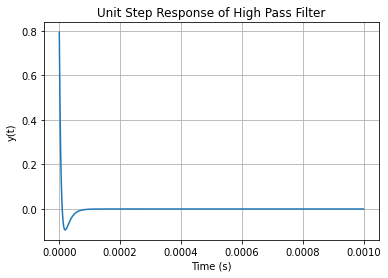

In [19]:
#Question 5

#defining the highpass filter 
A,b,V=highpass(10000,10000,1e-9,1e-9,1.586,1/s) 
Vo=V[3]

H = sympy_to_lti(Vo)
t = np.linspace(0, 0.001, 100000)
t, y = sig.impulse(H, None, t)

#plot the unit step response
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.title('Unit Step Response of High Pass Filter')
plt.grid(True)
plt.show()


In [20]:
Vo

-1.0e-9*(-1.586*s**4 - 475800.0*s**3 - 47580000000.0*s**2 - 1.586e+15*s)/(2.0e-9*s**5 + 0.0010414*s**4 + 212.42*s**3 + 21242000.0*s**2 + 1041400000000.0*s + 2.0e+16)